In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

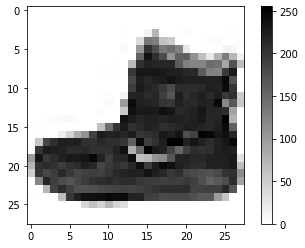

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

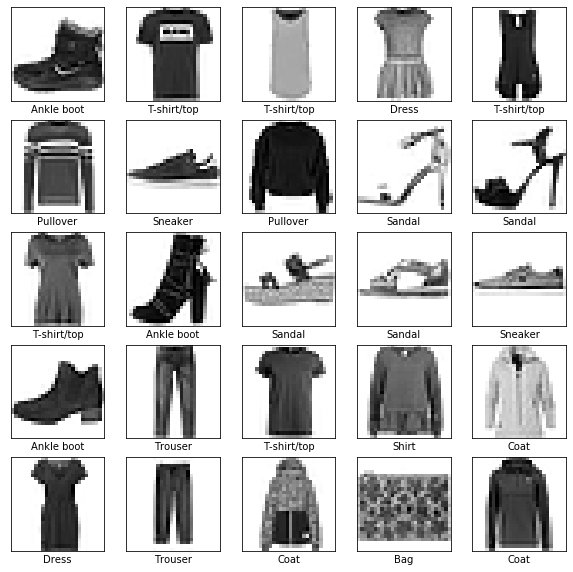

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential()

In [9]:
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10,  batch_size=32)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4915 - accuracy: 0.8265
Epoch 2/10
60000/60000 [==============================] - 10s 158us/sample - loss: 0.3700 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3337 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3105 - accuracy: 0.8870
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2917 - accuracy: 0.8925
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2775 - accuracy: 0.8983
Epoch 7/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2659 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2565 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2452 - accuracy: 0.9092
Epoc

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f'\nTest accuracy: {test_acc}')


Test accuracy: 0.8799999952316284


## Make Predictions

In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([3.4602929e-09, 8.4710344e-10, 4.6186915e-11, 1.7843778e-10,
       1.0576329e-09, 6.1749731e-04, 8.5839149e-09, 2.2527126e-03,
       1.3081902e-07, 9.9712974e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

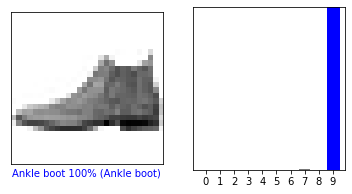

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

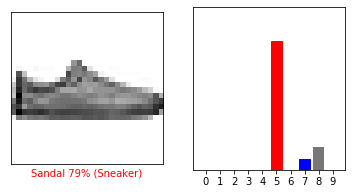

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

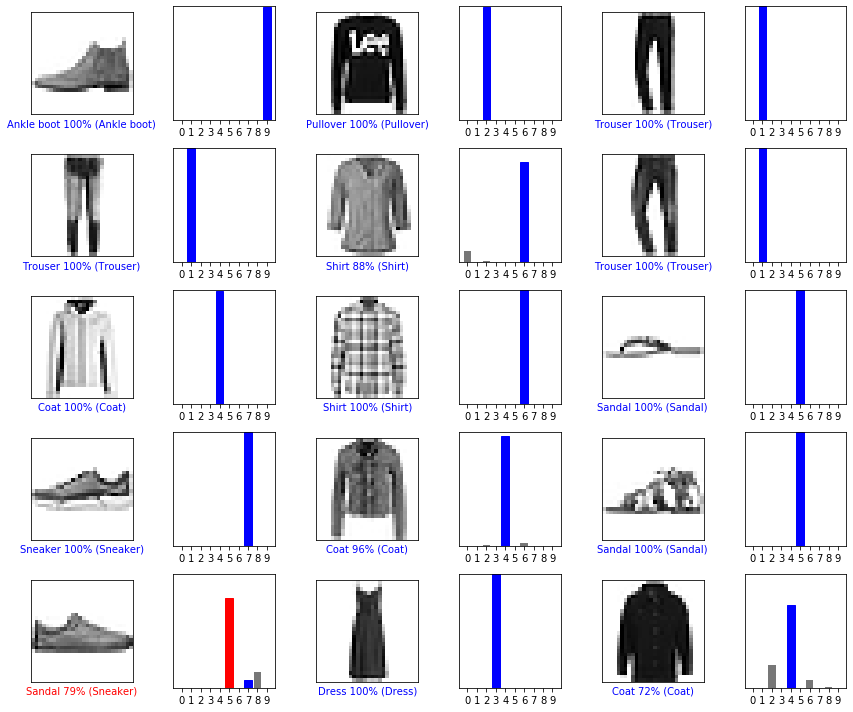

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)
 
print(predictions_single)

[[2.2459601e-04 1.0768537e-12 9.9739861e-01 4.4662603e-09 1.3203489e-03
  3.9024370e-12 1.0564624e-03 2.5915348e-11 5.2899338e-09 1.4172806e-12]]


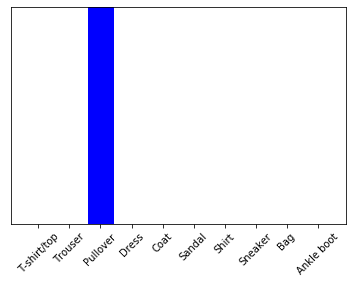

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2